### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [2]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv('social_network_ads.csv')

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(400, 5)


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

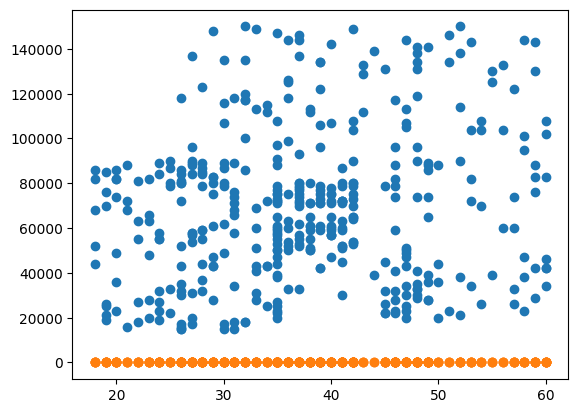

In [9]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
print(plt.scatter(df.age,df.estimated_salary))
print(plt.scatter(df.age,df.purchased))

### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [12]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
X = df.drop("purchased",axis=1)
y = df['purchased']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

catagorical_features = ["gender"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

X_train_transformed = transformer.fit_transform(X_train)

X_test_transformed = transformer.transform(X_test)

# Step 2: Select the features and target variable for modeling
model = LogisticRegression()
model.fit(X_train_transformed,y_train)


# Step 3: Split the data into training and test sets with a test size of 30%
model.score(X_test_transformed,y_test)


0.8875

In [7]:
# Step 4: Initialize and train a Logistic Regression model using the training data


# Step 5: Print the model's coefficients and intercept


### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [14]:
# Step 1: Make predictions on the test set using the trained model

y_pred = model.predict(X_test_transformed)
print(y_pred)

y_proba = model.predict_proba(X_test_transformed)
print(y_proba)
# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
report = classification_report(y_test,y_pred)
print(report)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
[[0.74440009 0.25559991]
 [0.01719714 0.98280286]
 [0.98357676 0.01642324]
 [0.12387647 0.87612353]
 [0.98782686 0.01217314]
 [0.95489969 0.04510031]
 [0.09969487 0.90030513]
 [0.92459368 0.07540632]
 [0.61144195 0.38855805]
 [0.57726975 0.42273025]
 [0.86451519 0.13548481]
 [0.31966803 0.68033197]
 [0.99324348 0.00675652]
 [0.99829378 0.00170622]
 [0.89205434 0.10794566]
 [0.58888634 0.41111366]
 [0.3079104  0.6920896 ]
 [0.29917136 0.70082864]
 [0.8598445  0.1401555 ]
 [0.09066142 0.90933858]
 [0.99738425 0.00261575]
 [0.92746356 0.07253644]
 [0.67902252 0.32097748]
 [0.02759155 0.97240845]
 [0.9988231  0.0011769 ]
 [0.49979524 0.50020476]
 [0.46809289 0.53190711]
 [0.85656055 0.14343945]
 [0.01119257 0.98880743]
 [0.9987791  0.0012209 ]
 [0.59628664 0.40371336]
 [0.99303638 0.00696362]
 [0.232419   0.767581  ]
 [0.9464444

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [ 7, 21]])

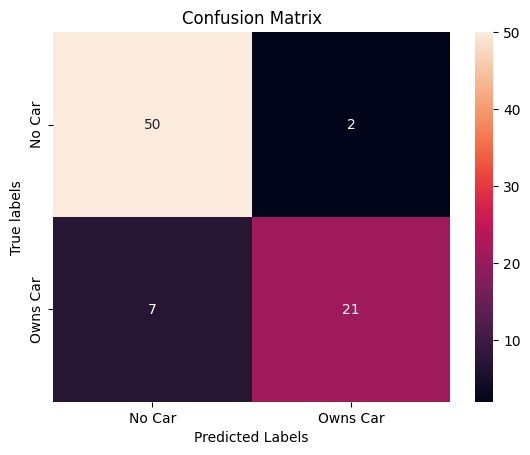

In [16]:
import seaborn as sns 
classes = ['No Car',"Owns Car"]
sns.heatmap(cm,annot=True,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()